In [0]:
#Read the data set
#Drop the columns which are unique for all users like IDs
#Distinguish the feature and target set 
#Divide the data set into training and test sets
#Normalize the train and test data
#Initialize & build the model
#Predict the results using 0.5 as a threshold
#Print the Accuracy score and confusion matrix 

In [502]:
from google.colab import files
files.upload()

Saving bank.csv to bank (9).csv


{'bank.csv': b"RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited\r\n1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1\r\n2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0\r\n3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1\r\n4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0\r\n5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0\r\n6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1\r\n7,15592531,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0\r\n8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1\r\n9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.5,0\r\n10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0\r\n11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0\r\n12,15737173,Andrews,497,Spain,Male,24,3,0,2,1,0,76390.01,0\r\n13,15632264,Kay,476,France,Female,34,10,0,2,1

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
%tensorflow_version 2.x

In [0]:
df=pd.read_csv("bank.csv")

In [544]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
#As RowNumber and CustomerID is unique we can drop these two columns
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [546]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [547]:
df.shape

(10000, 11)

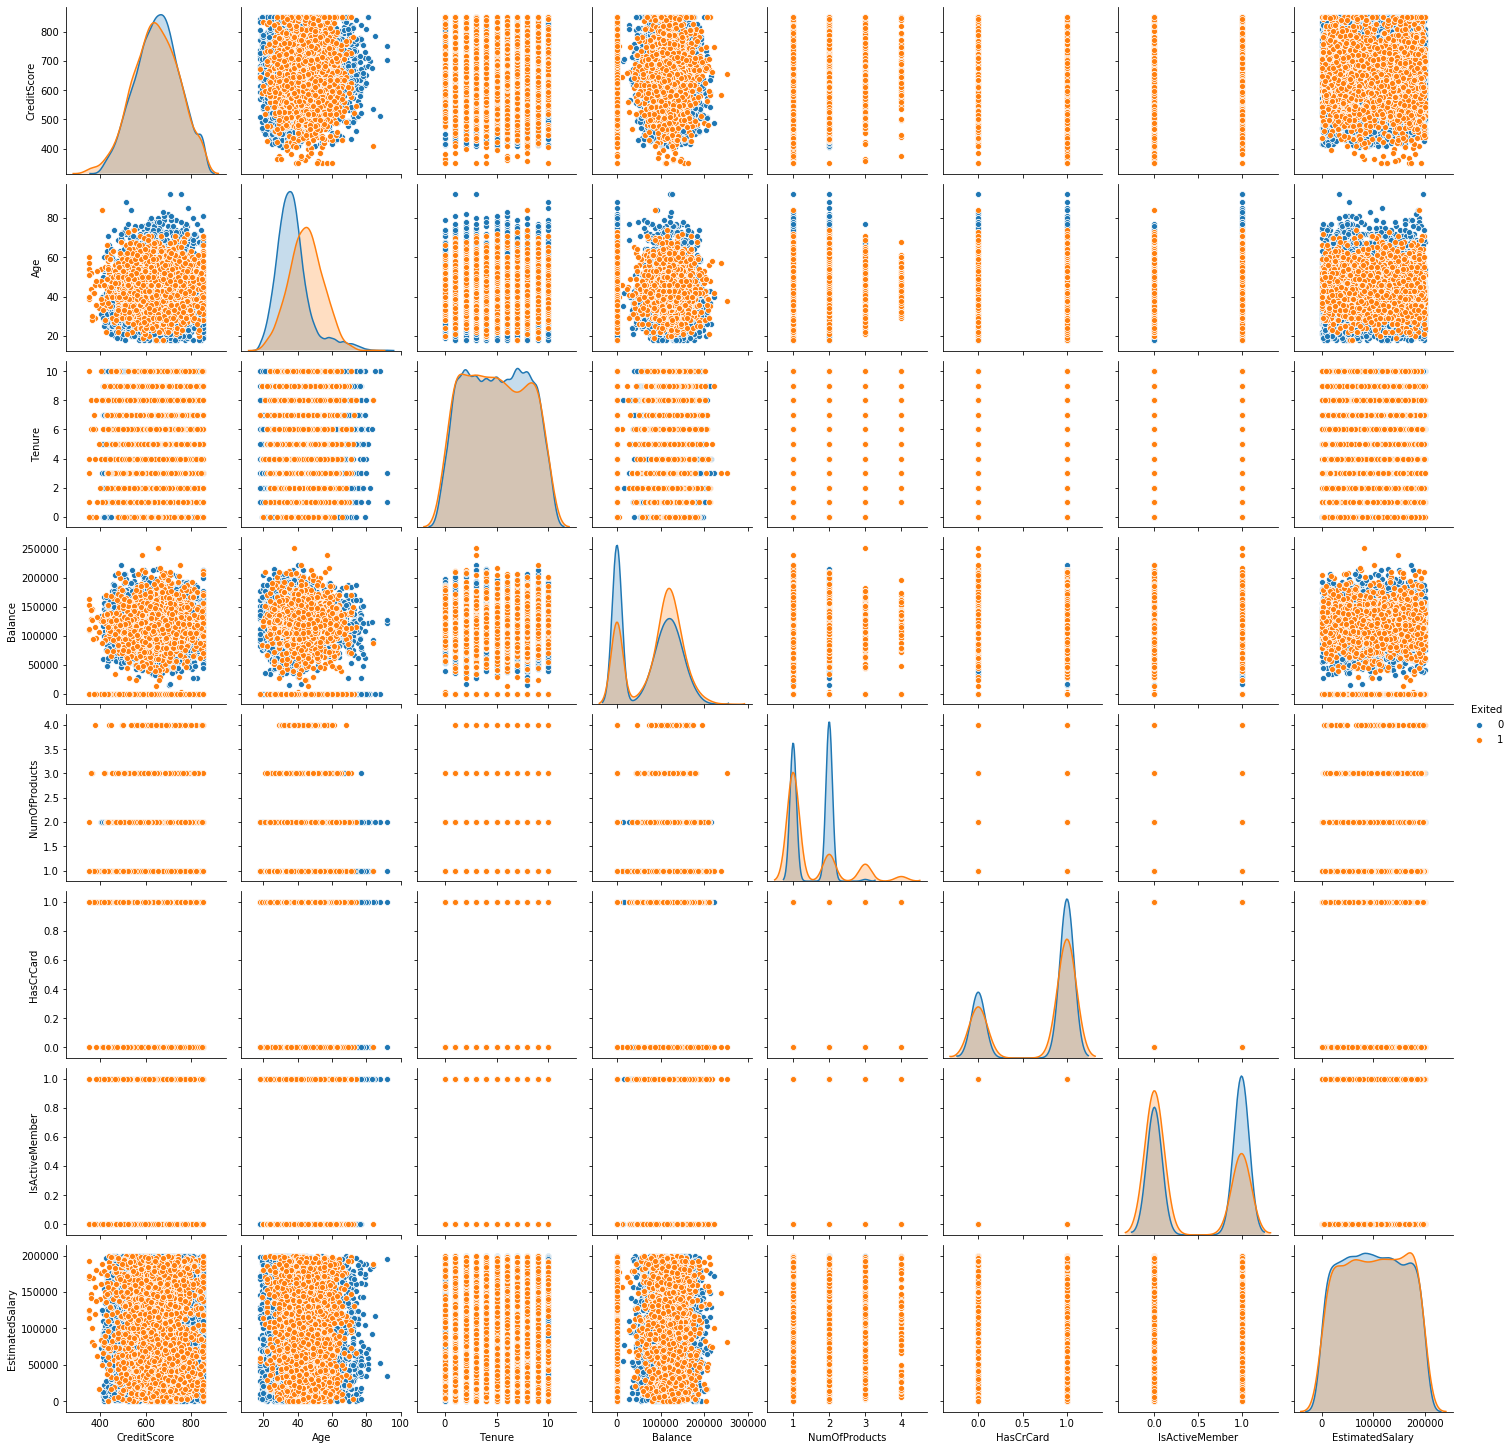

In [510]:
sns.pairplot(df,diag_kind='kde',hue='Exited')

In [0]:
# identifying Features and target Variable
# our target column is Exited and rest of the columns are features

In [548]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [549]:
#there is no missing value in dataset.
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [551]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [0]:
df=pd.get_dummies(df)

In [553]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Geography_France     10000 non-null uint8
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
Gender_Female        10000 non-null uint8
Gender_Male          10000 non-null uint8
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [0]:
df=df.astype('float32')

In [560]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
CreditScore          10000 non-null float32
Age                  10000 non-null float32
Tenure               10000 non-null float32
Balance              10000 non-null float32
NumOfProducts        10000 non-null float32
HasCrCard            10000 non-null float32
IsActiveMember       10000 non-null float32
EstimatedSalary      10000 non-null float32
Exited               10000 non-null float32
Geography_France     10000 non-null float32
Geography_Germany    10000 non-null float32
Geography_Spain      10000 non-null float32
Gender_Female        10000 non-null float32
Gender_Male          10000 non-null float32
dtypes: float32(14)
memory usage: 547.0 KB


In [0]:
#train test split
X=df.drop('Exited',axis=1)
y=df['Exited']

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.20,random_state=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93f6ef6828>,
      dtype=object)

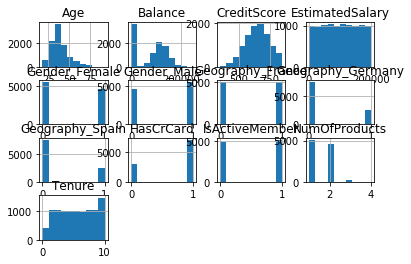

In [521]:
X.hist()

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test= sc.transform(X_test)

In [523]:
len(X_train)

8000

In [524]:
len(X_test)

2000

In [526]:
X_train.shape

(8000, 13)

In [527]:
X_test.shape

(2000, 13)

In [562]:
len(Y_test)

2000

In [530]:
Y_train

8369    1
9722    0
6950    0
1919    1
5713    0
       ..
350     0
79      0
8039    0
6936    0
5640    1
Name: Exited, Length: 8000, dtype: int64

In [531]:
Y_test

8018    1
9225    0
3854    0
2029    0
3539    0
       ..
6923    0
1207    0
7960    0
2339    0
6637    0
Name: Exited, Length: 2000, dtype: int64

In [0]:
len(Y_train)

In [0]:
import tensorflow as tf
model=tf.keras.Sequential()

In [0]:
from tensorflow.keras.layers import Dense

In [0]:
model.add(Dense(50,activation='relu', input_shape=(13,)))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [567]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 50)                700       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 51        
Total params: 751
Trainable params: 751
Non-trainable params: 0
_________________________________________________________________


In [568]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=20,verbose=1)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 1s 109us/sample - loss: 0.4654 - accuracy: 0.7946 - val_loss: 0.4340 - val_accuracy: 0.8035
Epoch 2/20
8000/8000 [==============================] - 0s 57us/sample - loss: 0.4112 - accuracy: 0.8234 - val_loss: 0.4151 - val_accuracy: 0.8260
Epoch 3/20
8000/8000 [==============================] - 0s 60us/sample - loss: 0.3909 - accuracy: 0.8361 - val_loss: 0.3973 - val_accuracy: 0.8380
Epoch 4/20
8000/8000 [==============================] - 0s 58us/sample - loss: 0.3717 - accuracy: 0.8465 - val_loss: 0.3877 - val_accuracy: 0.8435
Epoch 5/20
8000/8000 [==============================] - 0s 59us/sample - loss: 0.3582 - accuracy: 0.8540 - val_loss: 0.3766 - val_accuracy: 0.8470
Epoch 6/20
8000/8000 [==============================] - 0s 60us/sample - loss: 0.3500 - accuracy: 0.8568 - val_loss: 0.3706 - val_accuracy: 0.8520
Epoch 7/20
8000/8000 [==============================] - 0s 59us/sampl

In [569]:
score=model.evaluate(X_test,Y_test)

2000/2000 [==============================] - 0s 36us/sample - loss: 0.3657 - accuracy: 0.8510


In [570]:
score

[0.36572545969486236, 0.851]

In [0]:
y_predict = model.predict(X_test)
y_pred =(y_predict>0.5)

In [574]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[1536   52]
 [ 246  166]]
